In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the dataset and import machine learning Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Load dataset from Google Drive (update the path as needed)
data = pd.read_csv('/content/drive/MyDrive/ML/mining_dataset.csv')
print("Dataset loaded successfully.")
print(data.head())

Dataset loaded successfully.
                  date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Air Flow  ... Flotation Column 07 A

#Data cleanign and pre processing


In [ ]:
#date column is dropeed as it is not needed for modeling
data_cl = data.drop('date', axis=1, errors='ignore')

# Convert numeric columns with comma decimals to float
for col in data_cl.columns:
    if data_cl[col].dtype == 'object':  # Process string type columns
        try:
            data_cl[col] = data_cl[col].str.replace(',', '.').astype(float)
        except ValueError:
            print(f"Column '{col}' could not be converted to float.")

print("\nData info after conversion:")
data_cl.info()



Data info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Colum

In [ ]:
data_cl.head(5) # after conversion to float

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


#Exploratory Data Analysis (EDA)


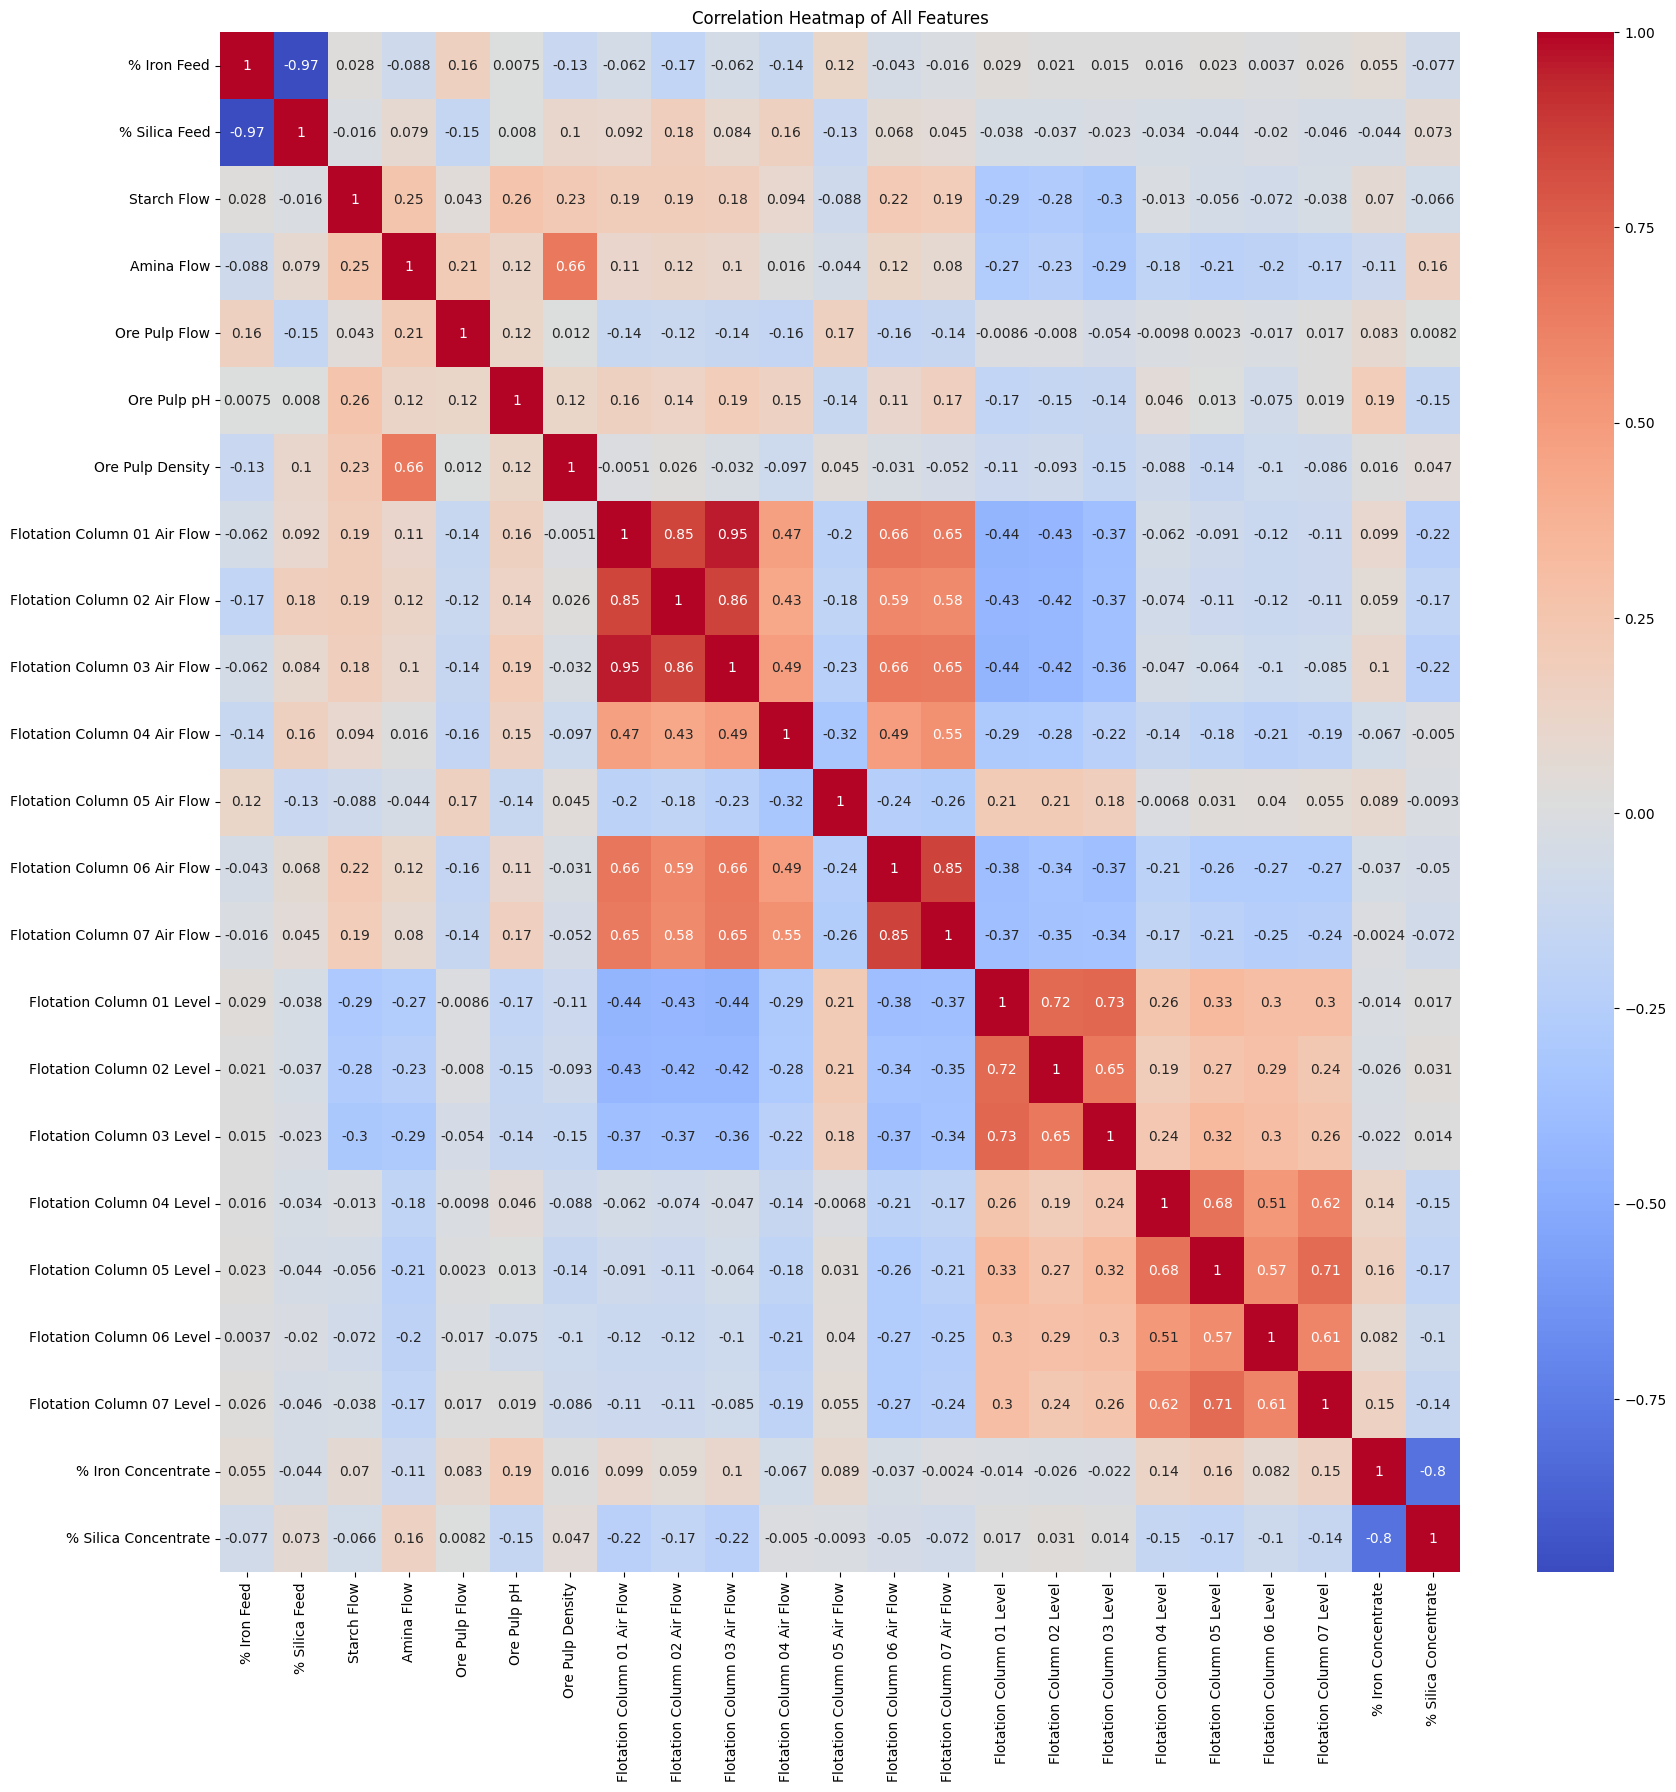

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_cl.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of All Features")
plt.show()


In [ ]:
data_cl.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

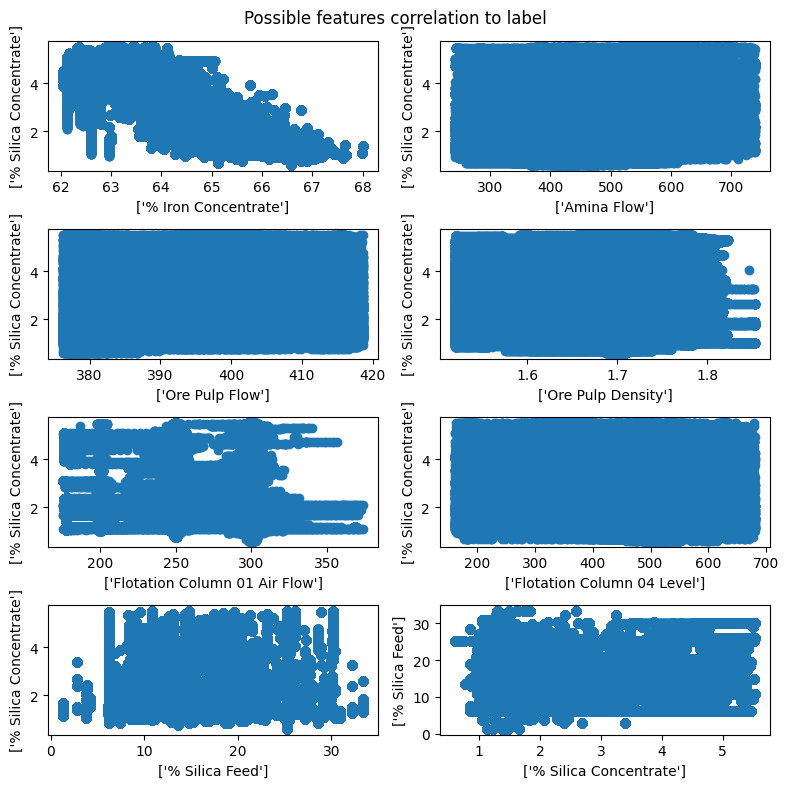

In [ ]:
## Feature vs Label Correlation Plot

fig, axs =plt.subplots(4,2,figsize=(8, 8))
fig.suptitle('Possible features correlation to label')


axs[0,0].scatter(data_cl['% Iron Concentrate'],data_cl['% Silica Concentrate'])
axs[0,0].set_xlabel(['% Iron Concentrate'])
axs[0,0].set_ylabel(['% Silica Concentrate'])

axs[0,1].scatter(data_cl['Amina Flow'],data_cl['% Silica Concentrate'])
axs[0,1].set_xlabel(['Amina Flow'])
axs[0,1].set_ylabel(['% Silica Concentrate'])

axs[1,0].scatter(data_cl['Ore Pulp Flow'],data_cl['% Silica Concentrate'])
axs[1,0].set_xlabel(['Ore Pulp Flow'])
axs[1,0].set_ylabel(['% Silica Concentrate'])

axs[1,1].scatter(data_cl['Ore Pulp Density'],data_cl['% Silica Concentrate'])
axs[1,1].set_xlabel(['Ore Pulp Density'])
axs[1,1].set_ylabel(['% Silica Concentrate'])

axs[2,0].scatter(data_cl['Flotation Column 01 Air Flow'],data_cl['% Silica Concentrate'])
axs[2,0].set_xlabel(['Flotation Column 01 Air Flow'])
axs[2,0].set_ylabel(['% Silica Concentrate'])

axs[2,1].scatter(data_cl[ 'Flotation Column 04 Level'],data_cl['% Silica Concentrate'])
axs[2,1].set_xlabel([ 'Flotation Column 04 Level'])
axs[2,1].set_ylabel(['% Silica Concentrate'])


axs[3,0].scatter(data_cl['% Silica Feed'],data_cl['% Silica Concentrate'])
axs[3,0].set_xlabel(['% Silica Feed'])
axs[3,0].set_ylabel(['% Silica Concentrate'])


axs[3,1].scatter(data_cl['% Silica Concentrate'],data_cl['% Silica Feed'])
axs[3,1].set_xlabel(['% Silica Concentrate'])
axs[3,1].set_ylabel(['% Silica Feed'])


plt.tight_layout()

#Dropping Unwanted columns and Feature engineering


In [ ]:
droplist = ['% Iron Feed','Starch Flow',
            'Ore Pulp pH','Flotation Column 02 Air Flow',
            'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
            'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
            'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
            'Flotation Column 02 Level', 'Flotation Column 03 Level',
            'Flotation Column 05 Level', 'Flotation Column 06 Level',
            'Flotation Column 07 Level']
data_cl = data_cl.drop(droplist, axis=1)
print("\nShape after dropping unwanted columns:", data_cl.shape)


Shape after dropping unwanted columns: (737453, 8)


In [ ]:
#Adding a new polynomial feature
data_cl['% Iron Concentrate_power2'] = data_cl['% Iron Concentrate'] ** 2
print("\nColumns after feature engineering:")
print(data_cl.columns)


Columns after feature engineering:
Index(['% Silica Feed', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 04 Level',
       '% Iron Concentrate', '% Silica Concentrate',
       '% Iron Concentrate_power2'],
      dtype='object')


In [ ]:
data_cl.info() #precleaning data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

#splitting data to training and test

In [ ]:
target = '% Silica Concentrate'
X = data_cl.drop(target, axis=1)
y = data_cl[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShapes:")
print("y:", y.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)



Shapes:
y: (737453,) y_train: (589962,) y_test: (147491,)


#Data normalization


In [ ]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("\nPeak-to-Peak range in raw features:")
print(np.ptp(X_train, axis=0))
print("Peak-to-Peak range in normalized features:")
print(np.ptp(X_train_norm, axis=0))


Peak-to-Peak range in raw features:
% Silica Feed                    32.09000
Amina Flow                      497.83500
Ore Pulp Flow                    42.39200
Ore Pulp Density                  0.33343
Flotation Column 01 Air Flow    198.31300
Flotation Column 04 Level       518.13900
% Iron Concentrate                5.96000
% Iron Concentrate_power2       775.15760
dtype: float64
Peak-to-Peak range in normalized features:
[4.71237465 5.45648833 4.36995836 4.81436396 6.69849509 5.64380306
 5.32601578 5.34806669]


#Model Evaluation (Baseline Model)

In [ ]:
def evaluate_model(model, X_train_norm, y_train, X_test_norm, y_test):
    # Training performance
    y_pred_train = model.predict(X_train_norm)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    # Test performance
    y_pred_test = model.predict(X_test_norm)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    return rmse_train, r2_train, rmse_test, r2_test

baseline_performance = {}

In [ ]:
# Lasso Baseline
lasso_baseline = Lasso(max_iter=10000, random_state=42)
lasso_baseline.fit(X_train_norm, y_train)
baseline_performance['Lasso'] = evaluate_model(lasso_baseline, X_train_norm, y_train, X_test_norm, y_test)


In [ ]:
# Ridge Baseline
ridge_baseline = Ridge(max_iter=10000, random_state=42)
ridge_baseline.fit(X_train_norm, y_train)
baseline_performance['Ridge'] = evaluate_model(ridge_baseline, X_train_norm, y_train, X_test_norm, y_test)

In [ ]:
# RandomForest Baseline
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train_norm, y_train)
baseline_performance['RandomForest'] = evaluate_model(rf_baseline, X_train_norm, y_train, X_test_norm, y_test)

In [ ]:
# XGB Baseline
xgb_baseline = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_baseline.fit(X_train_norm, y_train)
baseline_performance['XGB'] = evaluate_model(xgb_baseline, X_train_norm, y_train, X_test_norm, y_test)

In [ ]:

print("\nBaseline Model Performance (Before Hyperparameter Tuning):")
for model_name, metrics in baseline_performance.items():
    rmse_train, r2_train, rmse_test, r2_test = metrics
    print(f"{model_name}: Train RMSE: {rmse_train:.4f}, Train R2: {r2_train:.4f} | Test RMSE: {rmse_test:.4f}, Test R2: {r2_test:.4f}")


Baseline Model Performance (Before Hyperparameter Tuning):
Lasso: Train RMSE: 1.1259, Train R2: 0.0000 | Test RMSE: 1.1242, Test R2: -0.0000
Ridge: Train RMSE: 0.6344, Train R2: 0.6825 | Test RMSE: 0.6337, Test R2: 0.6822
RandomForest: Train RMSE: 0.0216, Train R2: 0.9996 | Test RMSE: 0.0590, Test R2: 0.9972
XGB: Train RMSE: 0.2993, Train R2: 0.9293 | Test RMSE: 0.3018, Test R2: 0.9279


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}
tuned_performance = {}

In [ ]:

# Lasso Regression
print("\nTuning Lasso Regression...")
lasso_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
lasso = Lasso(max_iter=1000, random_state=42)
grid_lasso = GridSearchCV(lasso, param_grid=lasso_param_grid, cv=kfold,
                          scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_lasso.fit(X_train_norm, y_train)
best_models['Lasso'] = grid_lasso.best_estimator_
print("Lasso best parameters:", grid_lasso.best_params_)
print("Lasso best CV score (neg RMSE):", grid_lasso.best_score_)
tuned_performance['Lasso'] = evaluate_model(best_models['Lasso'], X_train_norm, y_train, X_test_norm, y_test)



Tuning Lasso Regression...
Lasso best parameters: {'alpha': 0.0001}
Lasso best CV score (neg RMSE): -0.6417086923605657


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.679e+04, tolerance: 7.479e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Ridge Regression
print("\nTuning Ridge Regression...")
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
ridge = Ridge(max_iter=10000, random_state=42)
grid_ridge = GridSearchCV(ridge, param_grid=ridge_param_grid, cv=kfold,
                          scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train_norm, y_train)
best_models['Ridge'] = grid_ridge.best_estimator_
print("Ridge best parameters:", grid_ridge.best_params_)
print("Ridge best CV score (neg RMSE):", grid_ridge.best_score_)
tuned_performance['Ridge'] = evaluate_model(best_models['Ridge'], X_train_norm, y_train, X_test_norm, y_test)


Tuning Ridge Regression...
Ridge best parameters: {'alpha': 0.001}
Ridge best CV score (neg RMSE): -0.6344447616163256


In [ ]:
# RandomForest Regressor
print("\nTuning RandomForest Regressor...")
rf_param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15]}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid=rf_param_grid, cv=kfold,
                       scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_norm, y_train)
best_models['RandomForest'] = grid_rf.best_estimator_
print("RandomForest best parameters:", grid_rf.best_params_)
print("RandomForest best CV score (neg RMSE):", grid_rf.best_score_)
tuned_performance['RandomForest'] = evaluate_model(best_models['RandomForest'], X_train_norm, y_train, X_test_norm, y_test)


Tuning RandomForest Regressor...
RandomForest best parameters: {'max_depth': 15, 'n_estimators': 100}
RandomForest best CV score (neg RMSE): -0.18707824218536664


In [ ]:
# XGBRegressor
print("\nTuning XGBRegressor...")
xgb_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=kfold,
                        scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_norm, y_train)
best_models['XGB'] = grid_xgb.best_estimator_
print("XGB best parameters:", grid_xgb.best_params_)
print("XGB best CV score (neg RMSE):", grid_xgb.best_score_)
tuned_performance['XGB'] = evaluate_model(best_models['XGB'], X_train_norm, y_train, X_test_norm, y_test)



Tuning XGBRegressor...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGB best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
XGB best CV score (neg RMSE): -0.24205397360593617


In [ ]:
print("\nTuned Model Performance (After Hyperparameter Tuning):")
for model_name, metrics in tuned_performance.items():
    rmse_train, r2_train, rmse_test, r2_test = metrics
    print(f"{model_name}: Train RMSE: {rmse_train:.4f}, Train R2: {r2_train:.4f} | Test RMSE: {rmse_test:.4f}, Test R2: {r2_test:.4f}")



Tuned Model Performance (After Hyperparameter Tuning):
Lasso: Train RMSE: 0.6417, Train R2: 0.6752 | Test RMSE: 0.6409, Test R2: 0.6750
Ridge: Train RMSE: 0.6344, Train R2: 0.6825 | Test RMSE: 0.6337, Test R2: 0.6822
RandomForest: Train RMSE: 0.1781, Train R2: 0.9750 | Test RMSE: 0.1863, Test R2: 0.9725
XGB: Train RMSE: 0.2428, Train R2: 0.9535 | Test RMSE: 0.2466, Test R2: 0.9519


#Compare Model Performances (Baseline vs Tuned)

In [ ]:

print("\nPerformance Comparison (Baseline vs. Tuned):")
for model_name in baseline_performance.keys():
    b_rmse_train, b_r2_train, b_rmse_test, b_r2_test = baseline_performance[model_name]
    t_rmse_train, t_r2_train, t_rmse_test, t_r2_test = tuned_performance[model_name]
    print(f"{model_name}:")
    print(f"  Baseline -> Train RMSE: {b_rmse_train:.4f}, Train R2: {b_r2_train:.4f} | Test RMSE: {b_rmse_test:.4f}, Test R2: {b_r2_test:.4f}")
    print(f"  Tuned    -> Train RMSE: {t_rmse_train:.4f}, Train R2: {t_r2_train:.4f} | Test RMSE: {t_rmse_test:.4f}, Test R2: {t_r2_test:.4f}")



Performance Comparison (Baseline vs. Tuned):
Lasso:
  Baseline -> Train RMSE: 1.1259, Train R2: 0.0000 | Test RMSE: 1.1242, Test R2: -0.0000
  Tuned    -> Train RMSE: 0.6417, Train R2: 0.6752 | Test RMSE: 0.6409, Test R2: 0.6750
Ridge:
  Baseline -> Train RMSE: 0.6344, Train R2: 0.6825 | Test RMSE: 0.6337, Test R2: 0.6822
  Tuned    -> Train RMSE: 0.6344, Train R2: 0.6825 | Test RMSE: 0.6337, Test R2: 0.6822
RandomForest:
  Baseline -> Train RMSE: 0.0216, Train R2: 0.9996 | Test RMSE: 0.0590, Test R2: 0.9972
  Tuned    -> Train RMSE: 0.1781, Train R2: 0.9750 | Test RMSE: 0.1863, Test R2: 0.9725
XGB:
  Baseline -> Train RMSE: 0.2993, Train R2: 0.9293 | Test RMSE: 0.3018, Test R2: 0.9279
  Tuned    -> Train RMSE: 0.2428, Train R2: 0.9535 | Test RMSE: 0.2466, Test R2: 0.9519


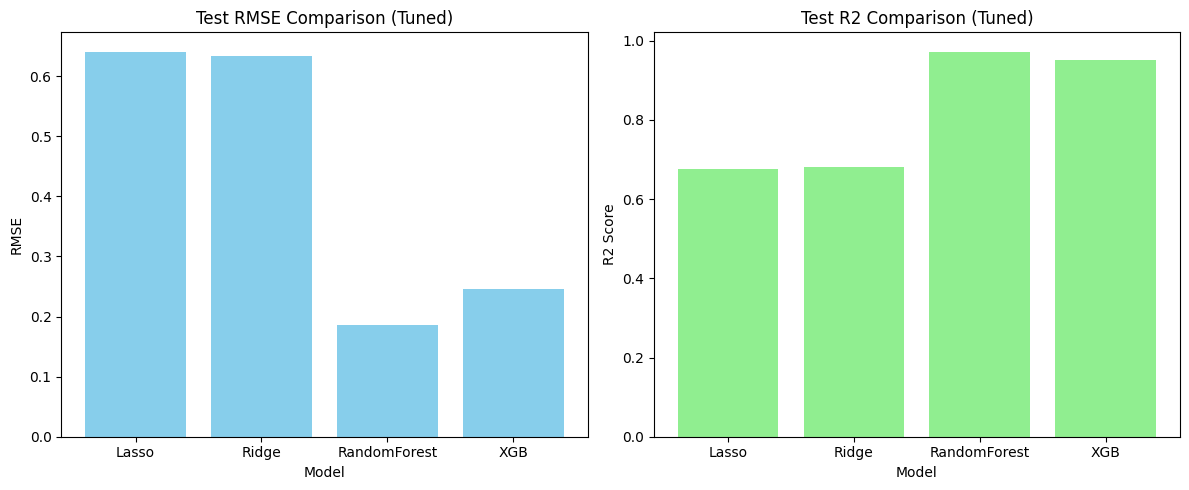

In [ ]:
# Plotting the comparison for Test RMSE and R2 scores for tuned models
models = list(tuned_performance.keys())
rmse_test_values = [tuned_performance[m][2] for m in models]  # index 2 is Test RMSE
r2_test_values = [tuned_performance[m][3] for m in models]    # index 3 is Test R2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(models, rmse_test_values, color='skyblue')
axes[0].set_title("Test RMSE Comparison (Tuned)")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")
axes[1].bar(models, r2_test_values, color='lightgreen')
axes[1].set_title("Test R2 Comparison (Tuned)")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2 Score")
plt.tight_layout()
plt.show()

#Test results


In [ ]:
y_pred_best = best_models['XGB'].predict(X_test_norm)

result_label = pd.DataFrame({
    '% Silica Concentrate': y_test,
    'Predicted % Silica Concentrate': y_pred_best  # Now y_pred_best is defined
})
print("\nTest Results (first 50 rows):")
print(result_label.reset_index(drop=True).head(50))


Test Results (first 50 rows):
    % Silica Concentrate  Predicted % Silica Concentrate
0               3.540000                        4.156534
1               1.300000                        1.631238
2               2.080000                        2.057569
3               1.450000                        1.304907
4               2.970000                        3.021159
5               1.180000                        1.095683
6               1.570000                        1.783604
7               5.520000                        4.501823
8               2.920000                        2.203253
9               4.927199                        4.827637
10              4.501191                        4.705589
11              4.280000                        4.121512
12              2.180000                        2.224078
13              5.050000                        5.091706
14              1.770000                        2.342175
15              3.330000                        2.963674


#Train vs Test visualization

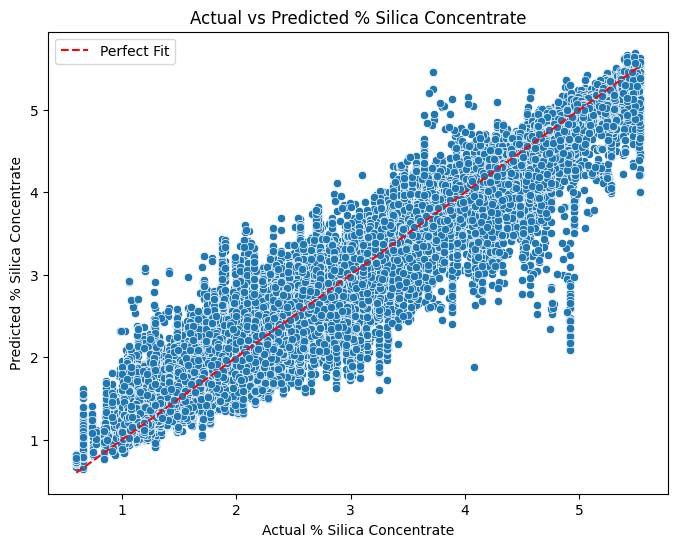

In [ ]:
y_pred = best_models['XGB'].predict(X_test_norm)  # Calculate y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)  # Use the calculated y_pred
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual % Silica Concentrate")
plt.ylabel("Predicted % Silica Concentrate")
plt.title("Actual vs Predicted % Silica Concentrate")
plt.legend()
plt.show()